In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [152]:
"""Reading the csv data,extracting the first 5 rows and checking dtypes"""
df=pd.read_csv("D:\\jn\\qskill-python-aiml-internship\\Task_1_python_Dataanalysis\\data\\netflix_data.csv")
df.head()
df.dtypes
""" cleaning the data by checking the null values and replacing it"""
df['cast']=df['cast'].fillna('Unknown')
df['country']=df['country'].fillna('others')
df['rating']=df['rating'].fillna('Not rated')
df['date_added']=df['date_added'].fillna('not available')
duration_mode=df['duration'].mode()[0]
df['duration']=df['duration'].fillna(duration_mode)
df.isna().sum()


show_id            0
type               0
title              0
director        2634
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

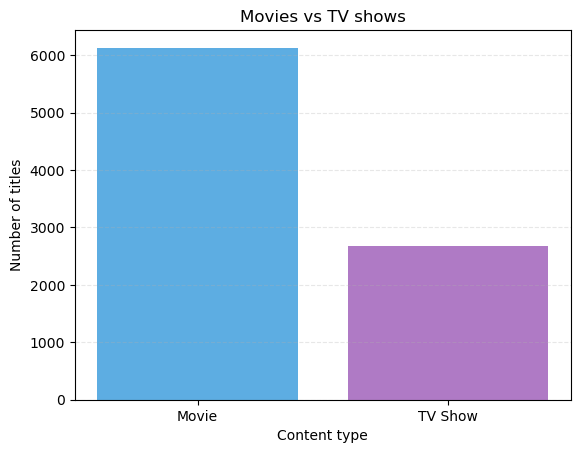

In [34]:
"""Exploratory data analysis"""
"""MOVIE VS TV SHOWS COUNT"""
df['type'].nunique()
type_counts=df['type'].value_counts()
unique_label=df['type'].unique()
color=['#5DADE2', '#AF7AC5']
plt.bar(type_counts.index,type_counts.values,color=['#5DADE2', '#AF7AC5'])
plt.grid(axis='y',linestyle='--',alpha=0.3)
plt.title("Movies vs TV shows")
plt.xlabel("Content type")
plt.ylabel("Number of titles")
plt.show()


    

In [ ]:
"""AVERAGE RELEASE MEAN"""
release_mean=int(df['release_year'].mean())#average year
min_year=df['release_year'].min()#Oldest year
max_year=df['release_year'].max()#Latest year
print(release_mean)
print(min_year)
print(max_year)

2014
1925
2021


release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Length: 74, dtype: int64


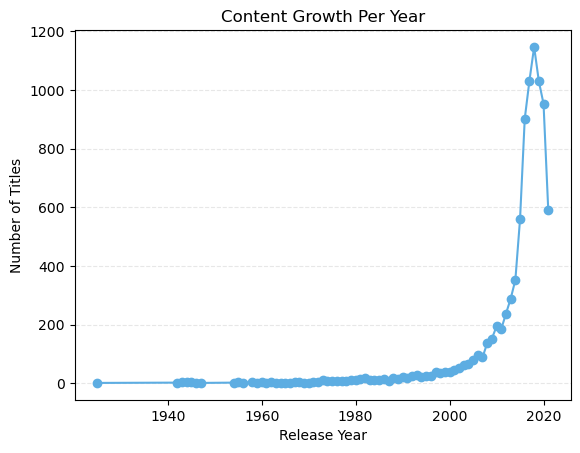

In [47]:
"""Content Growth Per Year"""
yearly_counts = df.groupby('release_year').size()
print(yearly_counts)
yearly_counts.sort_index()
plt.Figure(figsize=(8,5))
plt.plot(yearly_counts.index, 
         yearly_counts.values, 
         marker='o', 
         color='#5DADE2')

plt.title("Content Growth Per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")

plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

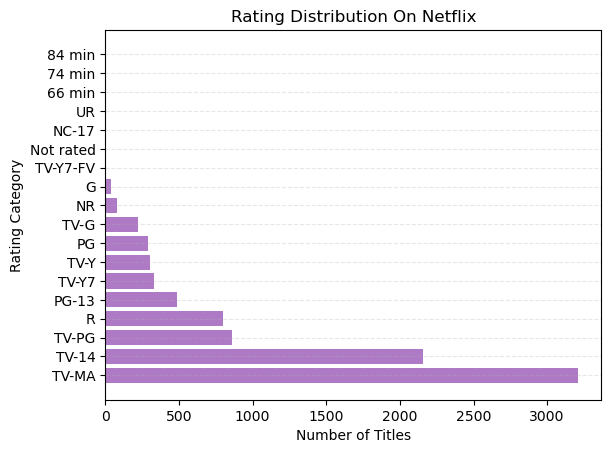

In [51]:
"""Rating Distribution Analysis"""
rate_counts=df['rating'].value_counts()
rate_counts.sort_values(ascending=False)
plt.barh(rate_counts.index,rate_counts.values,color=[ '#AF7AC5'])
plt.grid(axis='y',linestyle='--',alpha=0.3)
plt.title("Rating Distribution On Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Rating Category")
plt.show()


country
United States     2818
India              972
others             831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64


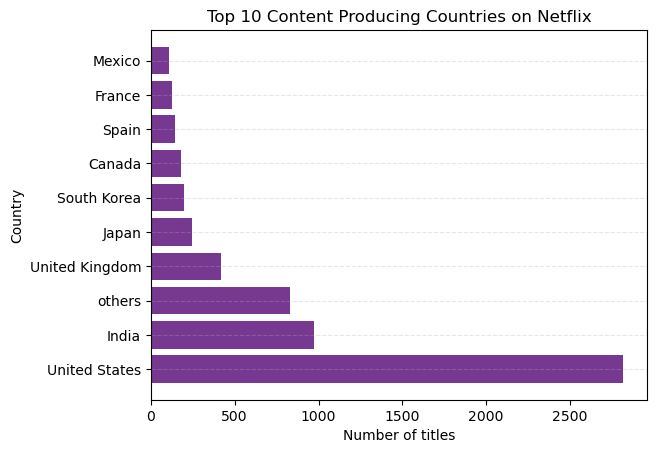

In [69]:
"""Top 10 Countries Analysis"""
country_counts=df['country'].value_counts()
top_10=country_counts.head(10)
print(top_10)
plt.barh(top_10.index,top_10.values,color=[ "#773892"])
plt.grid(axis='y',linestyle='--',alpha=0.3)
plt.title("Top 10 Content Producing Countries on Netflix")
plt.xlabel("Number of titles")
plt.ylabel("Country")
plt.show()



listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64


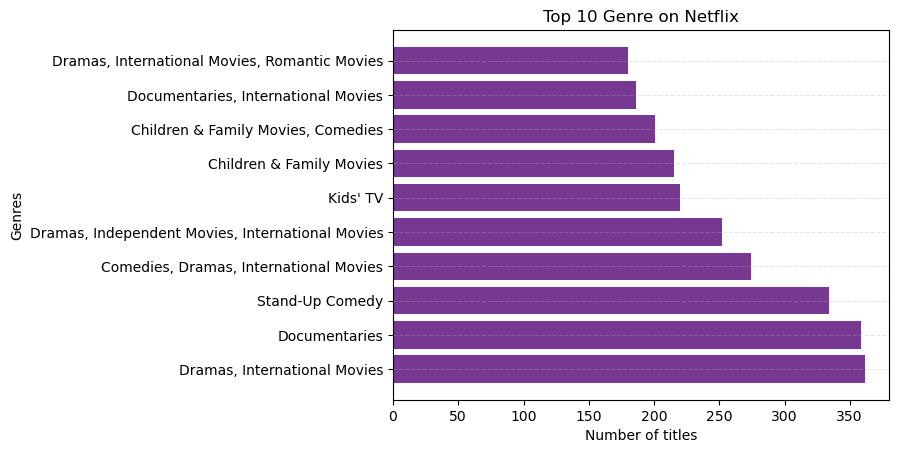

In [92]:
"""Genre Analysis"""
df=pd.read_csv("D:\\jn\\qskill-python-aiml-internship\\Task_1_python_Dataanalysis\\data\\netflix_data.csv")
df = df.explode('listed_in')
df['listed_in'] = df['listed_in'].astype(str).str.strip()
genre_counts = df['listed_in'].value_counts()
top_10_genres = genre_counts.head(10)
print(top_10_genres)
plt.barh(top_10_genres.index,top_10_genres.values,color=[ "#773892"])
plt.grid(axis='y',linestyle='--',alpha=0.3)
plt.title("Top 10 Genre on Netflix")
plt.xlabel("Number of titles")
plt.ylabel("Genres")
plt.show()





0      90
6      91
7     125
9     104
12    127
Name: duration_min, dtype: int64
Mean: 99.57718668407311
Median: 98.0
Mode: 90


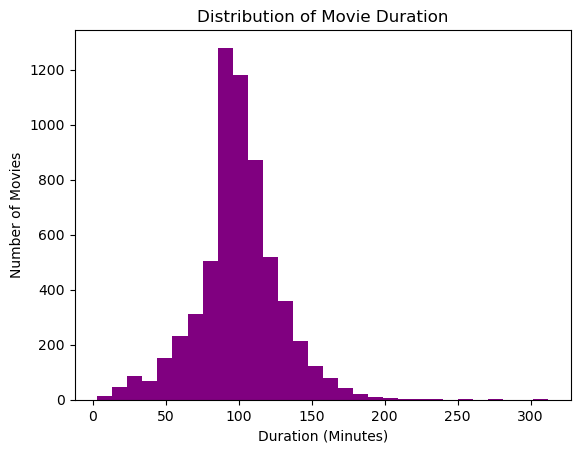

In [142]:
"""Movie Duration Analysis"""
# Filter only movies
movies = df[df['type'] == "Movie"].copy()

# Remove "min"
movies['duration_min'] = movies['duration'].str.replace('min', '', regex=False)

# Remove extra spaces
movies['duration_min'] = movies['duration_min'].str.strip()

# Convert safely to numeric
movies['duration_min'] = pd.to_numeric(movies['duration_min'], errors='coerce')

# Drop invalid rows
movies = movies.dropna(subset=['duration_min'])

# Convert to integer
movies['duration_min'] = movies['duration_min'].astype(int)

# Check result
print(movies['duration_min'].head())
print("Mean:", movies['duration_min'].mean())
print("Median:", movies['duration_min'].median())
print("Mode:", movies['duration_min'].mode()[0])
import matplotlib.pyplot as plt

plt.figure()
plt.hist(movies['duration_min'], bins=30,color="purple")
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Number of Movies")
plt.show()





1    2
2    1
3    1
4    2
5    1
Name: seasons, dtype: int64
seasons
1     1793
2      425
3      199
4       95
5       65
6       33
7       23
8       17
9        9
10       7
11       2
12       2
13       3
15       2
17       1
Name: count, dtype: int64


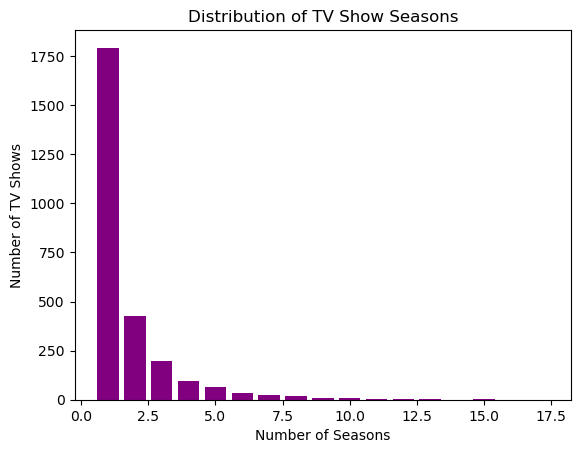

In [141]:
# Filter only TV Shows
shows = df[df['type'] == "TV Show"].copy()

# Remove "Season" and "Seasons"
shows['seasons'] = shows['duration'].str.replace('Seasons', '', regex=False)
shows['seasons'] = shows['seasons'].str.replace('Season', '', regex=False)

# Remove extra spaces
shows['seasons'] = shows['seasons'].str.strip()

# Convert safely
shows['seasons'] = pd.to_numeric(shows['seasons'], errors='coerce')

# Drop invalid rows
shows = shows.dropna(subset=['seasons'])

# Convert to integer
shows['seasons'] = shows['seasons'].astype(int)

# Check
print(shows['seasons'].head())
season_counts = shows['seasons'].value_counts().sort_index()
print(season_counts)
plt.figure()
plt.bar(season_counts.index, season_counts.values,color="purple")
plt.title("Distribution of TV Show Seasons")
plt.xlabel("Number of Seasons")
plt.ylabel("Number of TV Shows")
plt.show()


director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Jay Chapman            12
Youssef Chahine        12
Name: count, dtype: int64


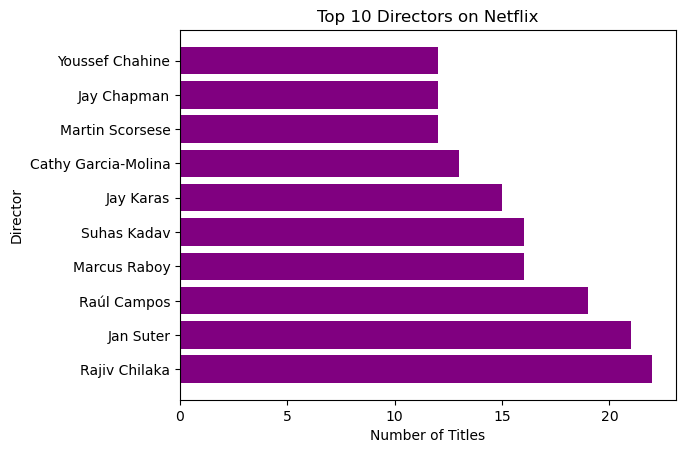

In [154]:
"""Top Director Analysis"""
# Remove rows with missing directors
df = df.dropna(subset=['director']).copy()

# Split multiple directors
df['director'] = df['director'].str.split(',')

# Explode into separate rows
df = df.explode('director')

# Remove extra spaces
df['director'] = df['director'].str.strip()

# Count top 10
top_10_directors = df['director'].value_counts().head(10)

print(top_10_directors)
plt.barh(top_10_directors.index, top_10_directors.values,color="purple")
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()



cast
Unknown             608
Anupam Kher          42
James Franco         37
Shah Rukh Khan       35
Julie Tejwani        34
Naseeruddin Shah     34
Rupa Bhimani         33
Kristen Bell         32
Amitabh Bachchan     32
Akshay Kumar         31
Name: count, dtype: int64


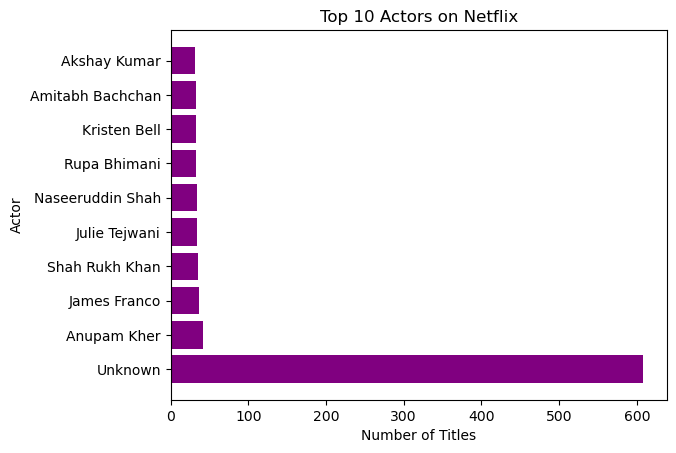

In [156]:
# ----- Top Actors Analysis -----

# Remove missing and empty cast values
actors_df = df.dropna(subset=['cast']).copy()
actors_df = actors_df[actors_df['cast'].str.strip() != ""]

# Split multiple actors
actors_df['cast'] = actors_df['cast'].str.split(',')

# Explode so each actor gets a separate row
actors_df = actors_df.explode('cast')

# Clean whitespace
actors_df['cast'] = actors_df['cast'].str.strip()

# Remove any remaining blanks
actors_df = actors_df[actors_df['cast'] != ""]

# Count top 10 actors
top_10_actors = actors_df['cast'].value_counts().head(10)

print(top_10_actors)

# Plot
import matplotlib.pyplot as plt

plt.figure()
plt.barh(top_10_actors.index, top_10_actors.values,color="purple")
plt.title("Top 10 Actors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Actor")
plt.show()

month
January      601
February     447
March        601
April        629
May          512
June         552
July         676
August       585
September    593
October      614
November     550
December     618
Name: count, dtype: int64


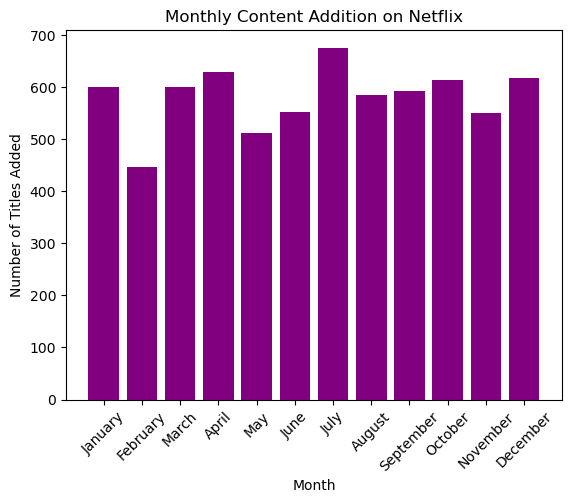

In [159]:
# Remove missing dates
month_df = df.dropna(subset=['date_added']).copy()

# Remove leading/trailing spaces
month_df['date_added'] = month_df['date_added'].str.strip()

# Convert safely to datetime
month_df['date_added'] = pd.to_datetime(
    month_df['date_added'],
    format='%B %d, %Y',
    errors='coerce'
)

# Drop any rows that still failed
month_df = month_df.dropna(subset=['date_added'])

# Extract month name
month_df['month'] = month_df['date_added'].dt.month_name()

# Count per month
monthly_counts = month_df['month'].value_counts()

# Arrange in calendar order
month_order = [
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]

monthly_counts = monthly_counts.reindex(month_order)

print(monthly_counts)

# Plot
import matplotlib.pyplot as plt

plt.figure()
plt.bar(monthly_counts.index, monthly_counts.values,color="purple")
plt.title("Monthly Content Addition on Netflix")
plt.xlabel("Month")
plt.ylabel("Number of Titles Added")
plt.xticks(rotation=45)
plt.show()

In [160]:
print("""
Final Conclusion:

The exploratory data analysis of the Netflix dataset reveals that Netflix
focuses heavily on movies, especially international dramas and documentaries.
Most movies are between 90–120 minutes, while most TV shows have only one season.
Content additions increased significantly after 2015, indicating rapid expansion.
The platform collaborates with a diverse set of directors and actors.
Overall, Netflix emphasizes global diversity and mature content strategy.
""")


Final Conclusion:

The exploratory data analysis of the Netflix dataset reveals that Netflix
focuses heavily on movies, especially international dramas and documentaries.
Most movies are between 90–120 minutes, while most TV shows have only one season.
Content additions increased significantly after 2015, indicating rapid expansion.
The platform collaborates with a diverse set of directors and actors.
Overall, Netflix emphasizes global diversity and mature content strategy.

